In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
import random

# Aprendizado de Máquina
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importando dados pré-tratados
data_df = pd.read_csv('cor-semana-pivot-tratado.csv')
display(data_df)


,Semana,Amarela,Branca,Indígena,Parda,Preta
0,SE_20 11,0.0,3.0,0.0,0.0,0.0
1,SE_20 12,2.0,51.0,0.0,5.0,2.0
2,SE_20 13,12.0,229.0,1.0,42.0,17.0
3,SE_20 14,28.0,595.0,1.0,170.0,73.0
4,SE_20 15,46.0,1040.0,3.0,348.0,139.0
5,SE_20 16,67.0,1492.0,3.0,537.0,195.0
6,SE_20 17,98.0,2011.0,4.0,752.0,277.0
7,SE_20 18,122.0,2667.0,4.0,1043.0,381.0
8,SE_20 19,152.0,3287.0,6.0,1346.0,468.0
9,SE_20 20,170.0,3975.0,7.0,1645.0,590.0


In [3]:
data_df['Total'] = data_df['Amarela']+data_df['Branca']+data_df['Indígena']+data_df['Parda']+data_df['Preta']

display(data_df)

,Semana,Amarela,Branca,Indígena,Parda,Preta,Total
0,SE_20 11,0.0,3.0,0.0,0.0,0.0,3.0
1,SE_20 12,2.0,51.0,0.0,5.0,2.0,60.0
2,SE_20 13,12.0,229.0,1.0,42.0,17.0,301.0
3,SE_20 14,28.0,595.0,1.0,170.0,73.0,867.0
4,SE_20 15,46.0,1040.0,3.0,348.0,139.0,1576.0
5,SE_20 16,67.0,1492.0,3.0,537.0,195.0,2294.0
6,SE_20 17,98.0,2011.0,4.0,752.0,277.0,3142.0
7,SE_20 18,122.0,2667.0,4.0,1043.0,381.0,4217.0
8,SE_20 19,152.0,3287.0,6.0,1346.0,468.0,5259.0
9,SE_20 20,170.0,3975.0,7.0,1645.0,590.0,6387.0


In [68]:
data_df[-2:]
#display(data_df['Total'].to_numpy())
#display(data_df['Semana'].to_numpy())

,Semana,Amarela,Branca,Indígena,Parda,Preta,Total
34,SE_20 45,463.0,12570.0,14.0,4873.0,1886.0,19806.0
35,SE_20 46,468.0,12694.0,14.0,4909.0,1899.0,19984.0


In [145]:
### CRIANDO OS DADOS DE TREINO ###

#extraindo apenas o total de mortes
total_mortes = data_df['Total'].to_numpy()
#removendo as últimas 20 semanas
mortes_treino = total_mortes[:20] 

#extraindo as datas
datas = data_df['Semana'].to_numpy()
datas = datas[:20]

#display(datas)

In [146]:
display(len(mortes_treino))
display(len(total_mortes))


20

36

In [191]:
janela = 5
horizonte = 5
num_samples = 10


X_train, Y_train, dates_train = [], [], []

for i in range(num_samples):
  start = np.random.randint(0, len(mortes_treino)-janela-horizonte)
  X_train.append(mortes_treino[start:start+janela])
  Y_train.append(mortes_treino[start+janela:start+janela+horizonte])
  dates_train.append(datas[start:start+janela+horizonte])





In [ ]:
#display(X_train[5:])

In [192]:
display(dates_train[-5:])

[array(['SE_20 15', 'SE_20 16', 'SE_20 17', 'SE_20 18', 'SE_20 19',
        'SE_20 20', 'SE_20 21', 'SE_20 22', 'SE_20 23', 'SE_20 24'],
       dtype=object),
 array(['SE_20 18', 'SE_20 19', 'SE_20 20', 'SE_20 21', 'SE_20 22',
        'SE_20 23', 'SE_20 24', 'SE_20 25', 'SE_20 26', 'SE_20 27'],
       dtype=object),
 array(['SE_20 19', 'SE_20 20', 'SE_20 21', 'SE_20 22', 'SE_20 23',
        'SE_20 24', 'SE_20 25', 'SE_20 26', 'SE_20 27', 'SE_20 28'],
       dtype=object),
 array(['SE_20 16', 'SE_20 17', 'SE_20 18', 'SE_20 19', 'SE_20 20',
        'SE_20 21', 'SE_20 22', 'SE_20 23', 'SE_20 24', 'SE_20 25'],
       dtype=object),
 array(['SE_20 20', 'SE_20 21', 'SE_20 22', 'SE_20 23', 'SE_20 24',
        'SE_20 25', 'SE_20 26', 'SE_20 27', 'SE_20 28', 'SE_20 29'],
       dtype=object)]

In [193]:
X_val = X_train[-5:]
Y_val = Y_train[-5:] 
dates_val = dates_train[-5:]

X_train = X_train[:5]
Y_train = Y_train[:5]


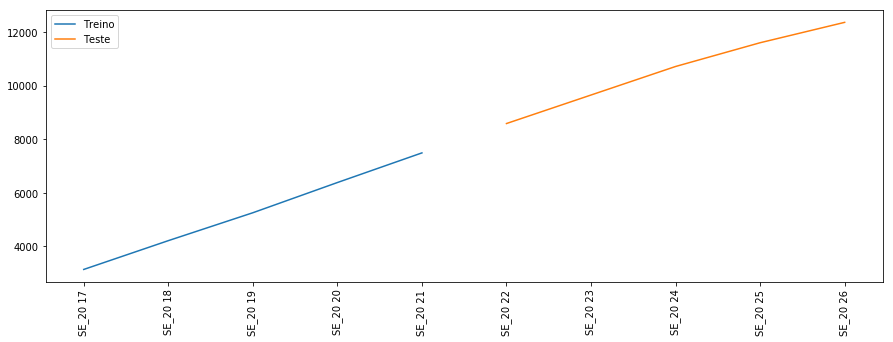

In [194]:
## Plot - Dados de Treino vs Dados de Teste
plt.figure(figsize=(15, 5))
plt.plot(range(janela), X_train[2], label='Treino')
plt.plot(range(janela, janela+horizonte), Y_train[2], label='Teste')
plt.xticks(range(janela+horizonte), dates_train[2], rotation=90)
plt.legend()
plt.show()

In [205]:
polynomialFeatures = PolynomialFeatures(degree=1)
X_poly = polynomialFeatures.fit_transform(X_train)

regress = LinearRegression() #criando
regress.fit(X_poly, Y_train) #treinando
ypred = regress.predict(X_poly) #usando

In [ ]:
#display(X_val)

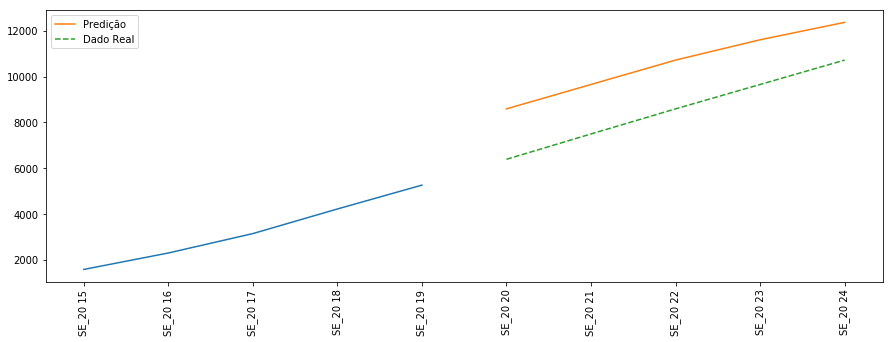

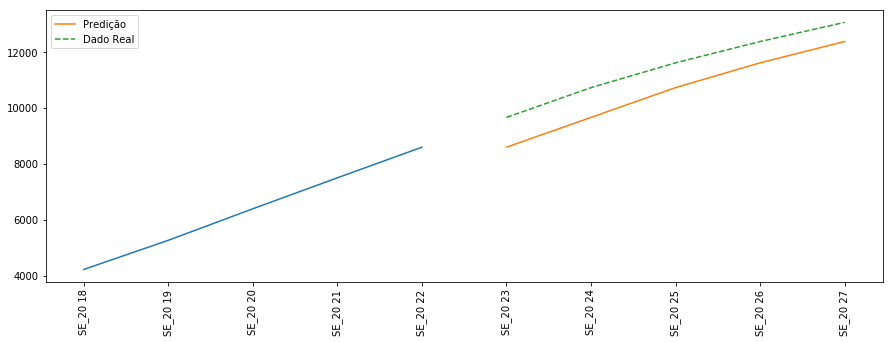

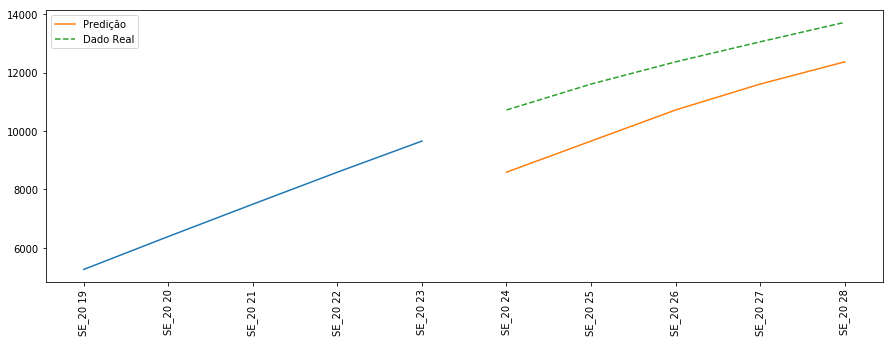

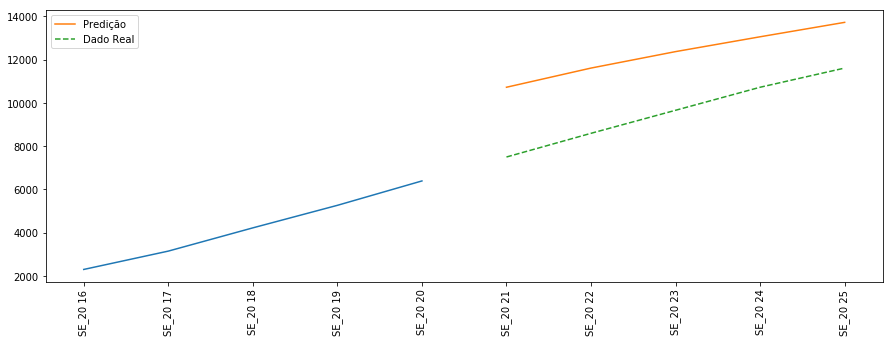

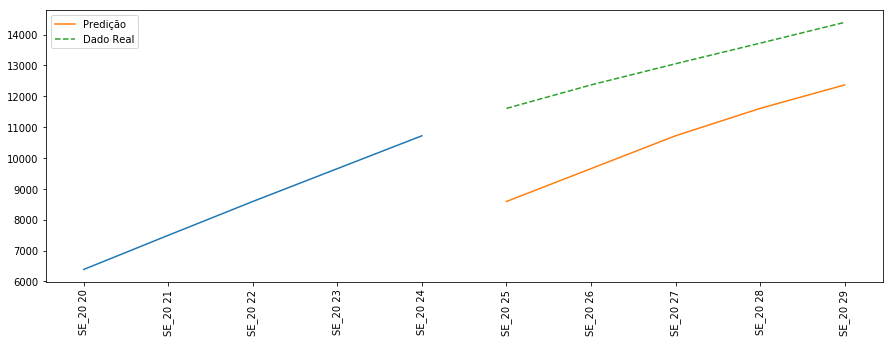

In [206]:
for k, sample in enumerate(X_val):
  plt.figure(figsize=(15, 5))
  plt.plot(range(janela), sample)
  plt.plot(range(janela, janela+horizonte), ypred[k], label='Predição')
  plt.plot(range(janela, janela+horizonte), Y_val[k], label='Dado Real',linestyle = 'dashed')
  plt.legend()
  plt.xticks(range(janela+horizonte), dates_val[k], rotation=90)
  plt.show()

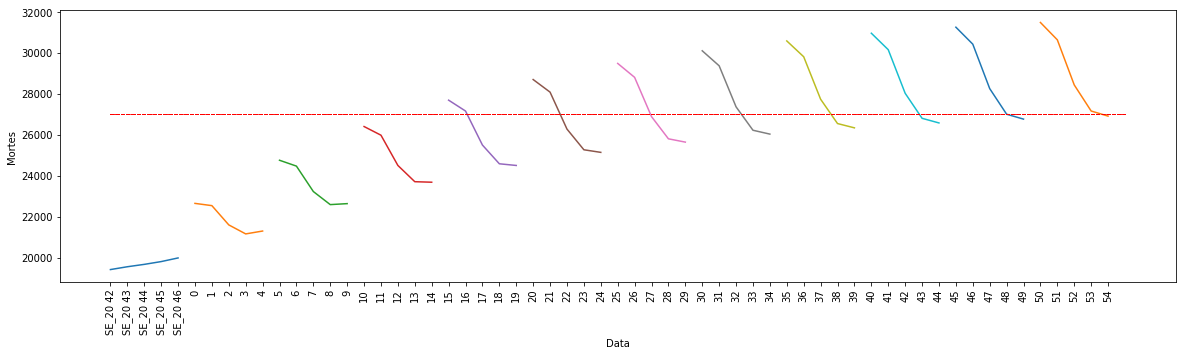

In [230]:
test_data  = data_df['Total'].to_numpy()
test_data = test_data[-janela:]

dates = data_df['Semana'].to_numpy()
dates = dates[-janela:]

steps = 11
plt.figure(figsize=(20, 5))
plt.plot(range(janela), test_data)

for i in range(steps): 
  XPoly = polynomialFeatures.transform([test_data])
  ypred = regress.predict(XPoly)

  plt.plot(range(janela + i*horizonte, janela+ (i+1)*horizonte), ypred[0], label='Step '+str(i))
  
  xticks = np.append(dates, [str(c) for c in range(horizonte*(i+1))] )
  plt.xticks(range(janela+(i+1)*horizonte), xticks, rotation=90)

  test_data = np.append(test_data[horizonte:], ypred)

  






  plt.ylabel('Mortes')
  plt.xlabel('Data')
  x = [0, 60]
  y = [27000, 27000]
  plt.plot(x, y, color="red", linewidth=1, linestyle = 'dashed')      
  #plt.legend()